In [1]:
import pandas as pd
import seaborn as sns
import viz

from matplotlib import pyplot as plt

colors = viz.plotting_style()
lin_colors = colors.values()

plt.style.use('style.mpl')


In [2]:
# Load the data for the NOSC correlation figure
# Description of the bac120 genes
bac120_meta_df = pd.read_csv('../data/gtdb/r207/bac120_msa_marker_info_r207_annot.csv',
                             index_col=0)

# Read the NOSC values for bac120 as a wide-form matrix
bac120_nosc_df = pd.read_csv('../data/gtdb/r207/bac120_nosc_vals_wide.csv', index_col=0)

# Read the correlation matrix for bac120 -- raw correlations first
nosc_corr_df = pd.read_csv('../data/gtdb/r207/bac120_nosc_corr.csv', index_col=[0,1])
# Correlations controlled for mean genome NOSC
nosc_corr_controlled_df = pd.read_csv('../data/gtdb/r207/bac120_nosc_corr_controlled_for_genome_nosc.csv', index_col=[0,1])

/Users/flamholz/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/flamholz/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/flamholz/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/flamholz/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

0.7932624352511349 ile tRNA syn. ser tRNA syn.
0.4095090511505405 FtsY RadA
0.2022310253031126 RplO PPAT
0.0175372666307355 SecG RecA


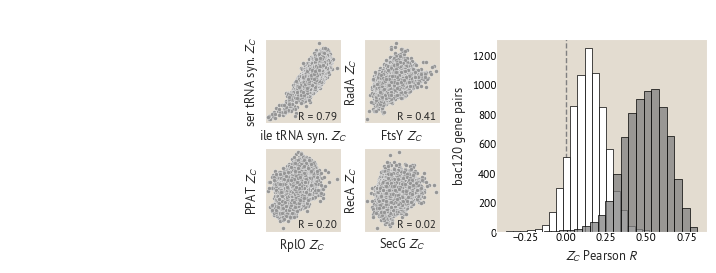

In [3]:
# TODO: 
fig = plt.figure(figsize=(7.24, 2.5))
subfigs = fig.subfigures(nrows=1, ncols=3, width_ratios=[1, 1, 1.2])
axsMiddle = subfigs[1].subplots(nrows=2, ncols=2)
axRight = subfigs[2].subplots(nrows=1, ncols=1)

pairs = ["TIGR00392,TIGR00414".split(','), "TIGR00064,TIGR00416".split(','),
         "TIGR01071,TIGR01510".split(','), 'TIGR00810,TIGR02012'.split(',') ]
pnames_dict = {
    'TIGR00392': 'ile tRNA syn.',
    'TIGR00414': 'ser tRNA syn.',
    'TIGR00810': 'SecG',
    'TIGR02012': 'RecA',
    'TIGR00064': 'FtsY',
    'TIGR00416': 'RadA',
    'TIGR01071': 'RplO',
    'TIGR01510': 'PPAT',  # pantetheine-phosphate adenylyltransferase
}
greys = sns.color_palette('Greys', n_colors=5)
for ax, gene_ids in zip(axsMiddle.flatten('C'), pairs):
    plt.sca(ax)

    sns.scatterplot(data=bac120_nosc_df, x=gene_ids[0], y=gene_ids[1], s=8, color=greys[2])

    desc0 = pnames_dict[gene_ids[0]]
    desc1 = pnames_dict[gene_ids[1]]
    label_fmt = '{0} $Z_C$'
    plt.xlabel(label_fmt.format(desc0), labelpad=3)
    plt.ylabel(label_fmt.format(desc1), labelpad=3)

    corr = nosc_corr_df.loc[gene_ids[0], gene_ids[1]].r
    print(corr, desc0, desc1)
    plt.text(0.95, 0.05, 'R = {0:.2f}'.format(corr), transform=plt.gca().transAxes, ha='right', fontsize=8)
    plt.xticks([])
    plt.yticks([])
    plt.tick_params(axis='both', which='both', length=0, pad=0)

plt.subplots_adjust(wspace=0.3, hspace=0.3)

plt.sca(axRight)
pal = sns.color_palette()
plt.axvline(0, color='grey', lw=1, ls='--', zorder=-1)
sns.histplot(data=nosc_corr_controlled_df.r, bins=20, color='w', edgecolor='k', linewidth=0.5, label='controlled', alpha=1.0)
sns.histplot(data=nosc_corr_df.r, bins=20, color='grey', edgecolor='k', linewidth=0.5, label='raw')
plt.xlabel('$Z_C$ Pearson $R$')
plt.ylabel('bac120 gene pairs')
#plt.legend(loc=2)
#plt.xlim(-1, 1)
plt.tick_params(axis='both', which='both', pad=0.1)


#plt.tight_layout()
plt.savefig('../output/Fig4.png', facecolor='w', dpi=300,  bbox_inches='tight')
plt.show()
